In [33]:
from sklearn.datasets import load_boston, load_breast_cancer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib.pyplot as plt
import numpy as np
import random as rd

# Decision trees and Random forests

In this assignment you will work with decision trees, baggin and randome forests.

## Regression

Housing Values in Suburbs of Boston: for regression you are asked to work on the Boston housing prices data set. 
It contains 506 training data points. Each house is located in a suburb, each has 13 features:
1. CRIM: Per capita crime rate by town
2. ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: Proportion of non-retail business acres per town
4. CHAS: Charles River (= 1 if suburb land bounds with the river; 0 otherwise)
5. NOX: Nitric oxides concentration (parts per 10 million)
6. RM: Average number of rooms per dwelling
7. AGE: Proportion of owner-occupied units built prior to 1940
8. DIS: Weighted distances to five Boston employment centres
9. RAD: Index of accessibility to radial highways
10. TAX: Full-value property-tax rate per $10,000
11. PTRATIO: Pupil-teacher ratio
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks
13. LSTAT: percentage of the lower status of the population

You need to predict the average housing price in suburbs

In [2]:
X, y = load_boston(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Decision trees:
* Study the effect of tree's depth on performance
* Select best depth using cross validation
* Visualize the tree
* What are important factors for house pricing?

In [4]:
# Variables

MAX_DEPTH = 40
history_training_TT = []
history_test_TT = []
history_training_CV = []
history_test_CV = []
cv_history = []

In [5]:
# Without CrossVal

for depth in range(1, MAX_DEPTH):
    # Training
    boston_regressor_dt = DecisionTreeRegressor(max_depth=depth)
    boston_regressor_dt.fit(X_train,y_train)
    # Predicting on Training Data
    training_y_hat = boston_regressor_dt.predict(X_train)
    training_regression_error = mse(y_train, training_y_hat)
    # Predicting on Testing Data
    test_y_hat = boston_regressor_dt.predict(X_test)
    test_regression_error = mse(y_test, test_y_hat)
    # Records
    history_training_TT.append(training_regression_error)
    history_test_TT.append(test_regression_error)

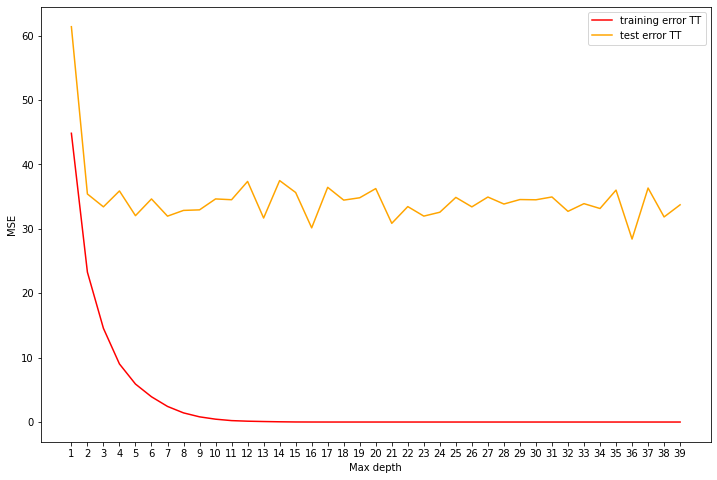

In [6]:
depths = list(range(1, MAX_DEPTH))
plt.figure(figsize=(12, 8))
plt.plot(depths, history_training_TT, color='red', label='training error TT')
plt.plot(depths, history_test_TT, color='orange', label='test error TT')
plt.xticks(depths)
plt.xlabel('Max depth')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [7]:
depths[np.argmin(history_test_TT)]

36

In [8]:
# With CrossVal

for depth in range(1, MAX_DEPTH):
    # Training
    boston_regressor_dt = DecisionTreeRegressor(max_depth=depth)
    cv_scores = cross_val_score(boston_regressor_dt, X_train, y_train, cv=10)
    cv_history.append(cv_scores.mean())
    boston_regressor_dt.fit(X_train,y_train)
    # Records
#     history_training_CV.append(boston_regressor_dt.score(X_train, y_train))
    history_test_CV.append(boston_regressor_dt.score(X_test, y_test))

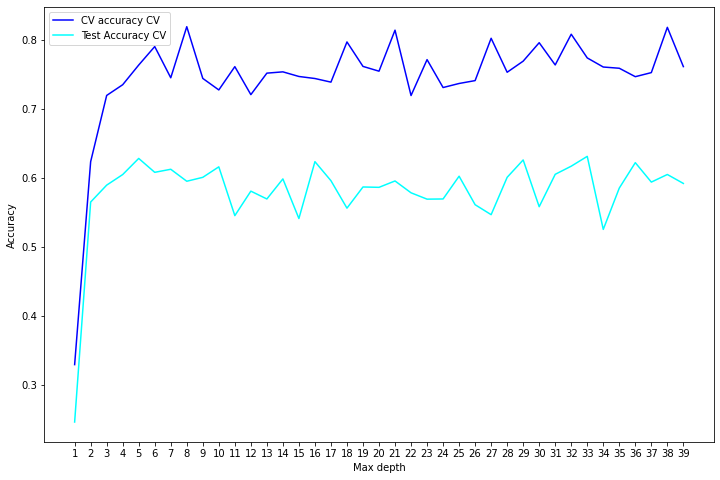

In [9]:
depths = list(range(1, MAX_DEPTH))
plt.figure(figsize=(12, 8))
plt.plot(depths, cv_history, color='blue', label='CV accuracy CV')
plt.plot(depths, history_test_CV, color='cyan', label='Test Accuracy CV')
plt.xticks(depths)
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
depths[np.argmax(history_test_CV)]

33

In [11]:
# for visibility, we will restrict ourselves to the local maximum at depth 5

tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

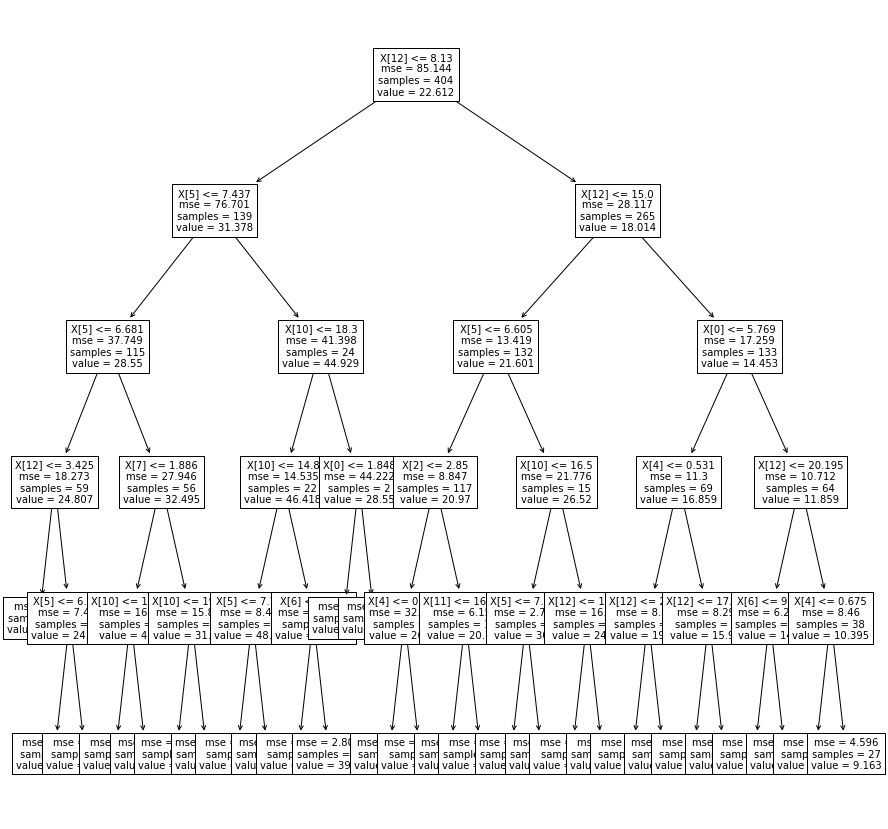

In [12]:
plt.figure(figsize=(15,15))
plot_tree(tree, fontsize=10)
plt.show()

Bagging and random forests:
* Study the effect of the number of trees in the ensemble
* Study the effect of selecting only a subset of features (in bagging you will use all `13` of them, in random forests you use only a subset m = sqrt(13) ~= 4). Check `max_features` parameter in sklearn *RandomForestClassifier* and *RandomForestRegressor*
* Play with the Out-Of-the-Bag error estimation (check `oob_score` in sklearn's models) and check how it can be used to approximate the test error.

In [13]:
# Bagging

training_history = []
test_history = [] 
NB_TREES = 200
for nb_trees in range(1, NB_TREES, 10):
    clf_rf = RandomForestRegressor(n_estimators=nb_trees) # We don't specifiy trees' max depth i.e all trees are
    #build until all nodes are pure
    clf_rf.fit(X_train,y_train)
    training_history.append(clf_rf.score(X_train,y_train))
    test_history.append(clf_rf.score(X_test, y_test))

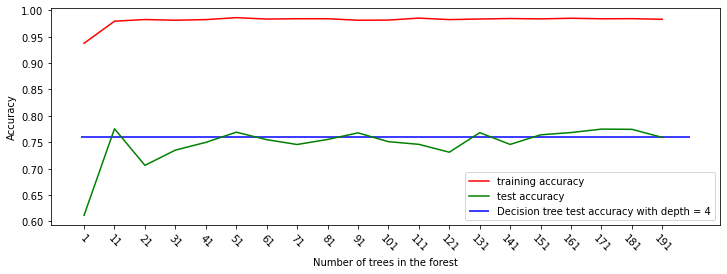

In [14]:
nb_trees = list(range(1, NB_TREES, 10))
plt.figure(figsize=(12,4))
plt.plot(nb_trees, training_history, label='training accuracy', color='red')
plt.plot(nb_trees, test_history, label='test accuracy', color='green')
plt.hlines(y=clf_rf.score(X_test, y_test), xmin=0, xmax=200, color='blue', label='Decision tree test accuracy with depth = 4')
plt.xticks(nb_trees, rotation=-45)
plt.xlabel('Number of trees in the forest')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
# Max Features

training_history = []
test_history = [] 
for nb_trees in range(1, NB_TREES, 10):
    clf_rf = RandomForestRegressor(n_estimators=nb_trees, max_features=4) # We don't specifiy trees' max depth i.e all trees are
    #build until all nodes are pure
    clf_rf.fit(X_train,y_train)
    training_history.append(clf_rf.score(X_train,y_train))
    test_history.append(clf_rf.score(X_test, y_test))

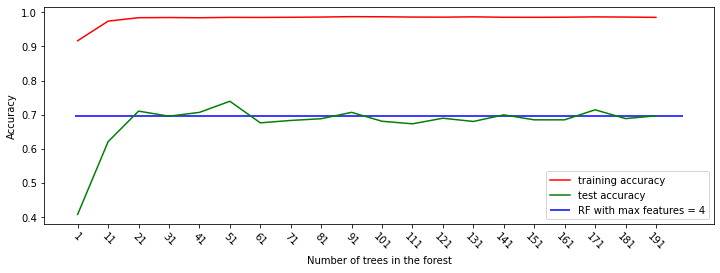

In [16]:
nb_trees = list(range(1, NB_TREES, 10))
plt.figure(figsize=(12,4))
plt.plot(nb_trees, training_history, label='training accuracy', color='red')
plt.plot(nb_trees, test_history, label='test accuracy', color='green')
plt.hlines(y=clf_rf.score(X_test, y_test), xmin=0, xmax=200, color='blue', label='RF with max features = 4')
plt.xticks(nb_trees, rotation=-45)
plt.xlabel('Number of trees in the forest')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
# OOB

training_history = []
test_history = [] 
for nb_trees in range(1, NB_TREES, 10):
    clf_rf = RandomForestRegressor(n_estimators=nb_trees, max_features=4, oob_score=True)
    #build until all nodes are pure
    clf_rf.fit(X_train,y_train)
    training_history.append(clf_rf.score(X_train,y_train))
    test_history.append(clf_rf.score(X_test, y_test))

/home/qlr/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/qlr/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


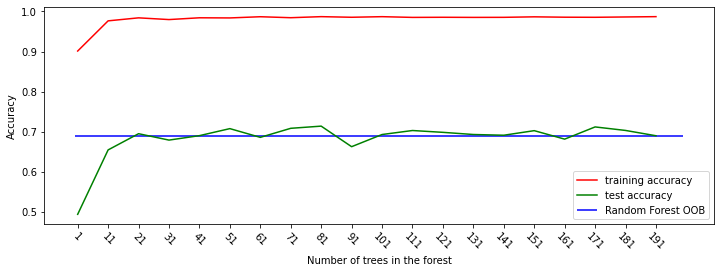

In [18]:
nb_trees = list(range(1, NB_TREES, 10))
plt.figure(figsize=(12,4))
plt.plot(nb_trees, training_history, label='training accuracy', color='red')
plt.plot(nb_trees, test_history, label='test accuracy', color='green')
plt.hlines(y=clf_rf.score(X_test, y_test), xmin=0, xmax=200, color='blue', label='Random Forest OOB')
plt.xticks(nb_trees, rotation=-45)
plt.xlabel('Number of trees in the forest')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Classification

For classification you will work on breast cancer wisconsin dataset a classic and very easy binary classification dataset.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. Your goal is to predict diagnosis (0 = malignant, 1 = benign).

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

Then, the mean, standard error and "worst" are computed for each of these 10 measures resulting in 30 total features. For example we compute the radius of the nuclei of the cells of some patient, we then compute the mean, the standard deviation and the largest radious found.

In [19]:
feature_names = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension']

In [20]:
X, y = load_breast_cancer(return_X_y=True)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Decision trees and random forest: Do the same for as for the regression case.

### Decision Tree

In [22]:
# Declare variables

MAX_DEPTH = 20
cv_history = []
test_history = []
train_history = []

In [23]:
for depth in range(1, MAX_DEPTH):
    clf = DecisionTreeClassifier(random_state=0, max_depth=depth)
    cv_scores = cross_val_score(clf, X_train, y_train, cv=10)
    cv_history.append(cv_scores.mean())
    clf.fit(X_train, y_train)
    train_history.append(clf.score(X_train, y_train))
    test_history.append(clf.score(X_test, y_test))

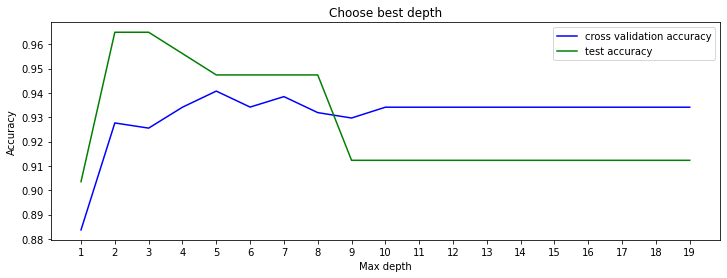

In [24]:
depths = list(range(1, MAX_DEPTH))
plt.figure(figsize=(12,4))
plt.plot(depths, cv_history, label='cross validation accuracy', color='blue')
plt.plot(depths, test_history, label='test accuracy', color='green')
# Uncomment me if you want to see training errors
#plt.plot(depths, train_history, label='training accuracy', color='red')
plt.xticks(depths)
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.title('Choose best depth')
plt.legend()
plt.show()

In [25]:
depths[np.argmax(test_history)] #2 or 3

2

In [26]:
clf = DecisionTreeClassifier(random_state=0, max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [27]:
sorted_features = sorted(zip(X_train, clf.feature_importances_), key= lambda couple: couple[1])
features, scores = zip(*sorted_features)

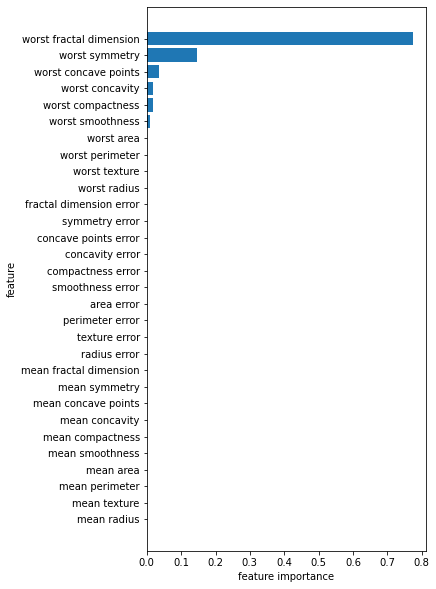

In [32]:
plt.figure(figsize=(5,10))
plt.barh(range(len(features)), scores, align='center')
plt.yticks(range(len(features)),feature_names)
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.show()

### Random Forest

In [34]:
training_history = []
test_history = [] 
NB_TREES = 200
for nb_trees in range(1, NB_TREES, 10):
    clf_rf = RandomForestClassifier(n_estimators=nb_trees) # We don't specifiy trees' max depth i.e all trees are
    #build until all nodes are pure
    clf_rf.fit(X_train,y_train)
    training_history.append(clf_rf.score(X_train,y_train))
    test_history.append(clf_rf.score(X_test, y_test))

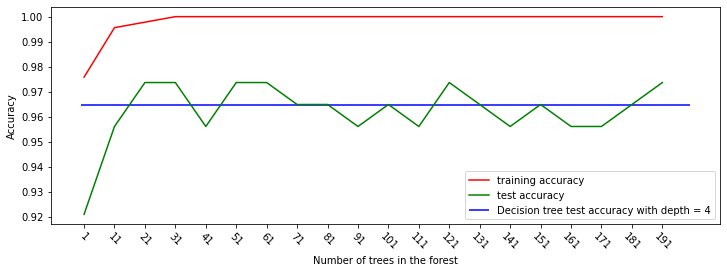

In [35]:
nb_trees = list(range(1, NB_TREES, 10))
plt.figure(figsize=(12,4))
plt.plot(nb_trees, training_history, label='training accuracy', color='red')
plt.plot(nb_trees, test_history, label='test accuracy', color='green')
plt.hlines(y=clf.score(X_test, y_test), xmin=0, xmax=200, color='blue', label='Decision tree test accuracy with depth = 4')
plt.xticks(nb_trees, rotation=-45)
plt.xlabel('Number of trees in the forest')
plt.ylabel('Accuracy')
plt.legend()
plt.show()